# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import palmerpenguins
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
df = palmerpenguins.load_penguins()
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Dummify Species


In [2]:
# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the species column
enc.fit(df[['species']])

# Transform the species column into a one-hot encoded matrix
encoded_species = enc.transform(df[['species']]).toarray()

# Create a new DataFrame with the one-hot encoded species
encoded_species_df = pd.DataFrame(encoded_species, columns=enc.get_feature_names_out(['species']))

# Concatenate the original DataFrame with the encoded species DataFrame
df_encoded = pd.concat([df, encoded_species_df], axis=1)

# Display the first few rows of the new DataFrame
df_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0


Dummify Island


In [3]:
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the species column
enc.fit(df[['island']])

# Transform the species column into a one-hot encoded matrix
encoded_island = enc.transform(df[['island']]).toarray()

# Create a new DataFrame with the one-hot encoded species
encoded_island_df = pd.DataFrame(encoded_island, columns=enc.get_feature_names_out(['island']))

# Concatenate the original DataFrame with the encoded species DataFrame
df2_encoded = pd.concat([df_encoded, encoded_island_df], axis=1)

df2_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0


Dummify Sex


In [4]:
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the species column
enc.fit(df[['sex']])

# Transform the species column into a one-hot encoded matrix
encoded_sex = enc.transform(df[['sex']]).toarray()

# Create a new DataFrame with the one-hot encoded species
encoded_sex_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['sex']))

# Concatenate the original DataFrame with the encoded species DataFrame
df3_encoded = pd.concat([df2_encoded, encoded_sex_df], axis=1)

df3_encoded.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,sex_nan
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Model1

In [5]:
from sklearn.model_selection import train_test_split

lr = LinearRegression()

X = df3_encoded[['bill_length_mm']]
y = df3_encoded['bill_depth_mm']

X = X.dropna()  # Drop rows with NaN in X
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_fit1 = lr.fit(X_train, y_train)

train_preds1 = lr_fit1.predict(X_train)
test_preds1 = lr_fit1.predict(X_test)

Model2

In [7]:
from sklearn.model_selection import train_test_split
#X = ames[["Gr Liv Area", "TotRms AbvGrd"]]

X2 = df3_encoded[['bill_length_mm', 'species_Adelie', 'species_Chinstrap']]

y = df3_encoded['bill_depth_mm']

# Remove rows with NaN values in predictors or target
X2 = X2.dropna()
y = y[X2.index]

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2)

lr_fit2 = lr.fit(X_train2, y_train2)

train_preds2 = lr_fit2.predict(X_train2)
test_preds2 = lr_fit2.predict(X_test2)

Model3

In [8]:
lr = LinearRegression()
X3 = df3_encoded[['bill_length_mm', 'species_Adelie', 'species_Chinstrap', 'island_Dream', 'island_Torgersen']]
y = df3_encoded['bill_depth_mm']

# Remove rows with NaN values in predictors or target
X3 = X3.dropna()
y = y[X3.index]

# Split data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2)

lr_fit3 = lr.fit(X_train3, y_train3)

train_preds3 = lr_fit3.predict(X_train3)
test_preds3 = lr_fit3.predict(X_test3)

Model4

In [9]:
lr = LinearRegression()
X4 = df3_encoded[['bill_length_mm', 'species_Adelie', 'species_Chinstrap', 'island_Dream', 'island_Torgersen', 'sex_male']]

y = df3_encoded['bill_depth_mm']

# Remove rows with NaN values in predictors or target
X4 = X4.dropna()
y = y[X4.index]

# Split data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2)



lr_fit4 = lr.fit(X_train4, y_train4)

train_preds4 = lr_fit4.predict(X_train4)
test_preds4 = lr_fit4.predict(X_test4)

Graph

In [10]:
mse_train1 = mean_squared_error(y_train, train_preds1)
mse_test1 = mean_squared_error(y_test, test_preds1)

mse_train2 = mean_squared_error(y_train, train_preds2)
mse_test2 = mean_squared_error(y_test, test_preds2)

mse_train3 = mean_squared_error(y_train, train_preds3)
mse_test3 = mean_squared_error(y_test, test_preds3)

mse_train4 = mean_squared_error(y_train, train_preds4)
mse_test4 = mean_squared_error(y_test, test_preds4)

#Output print referenced from gemini (for clean, readable values)
print(f"Model 1 - Train MSE: {mse_train1:.2f}, Test MSE: {mse_test1:.2f}")
print(f"Model 2 - Train MSE: {mse_train2:.2f}, Test MSE: {mse_test2:.2f}")
print(f"Model 3 - Train MSE: {mse_train3:.2f}, Test MSE: {mse_test3:.2f}")
print(f"Model 4 - Train MSE: {mse_train4:.2f}, Test MSE: {mse_test4:.2f}")

Model 1 - Train MSE: 3.94, Test MSE: 4.25
Model 2 - Train MSE: 7.37, Test MSE: 7.07
Model 3 - Train MSE: 6.81, Test MSE: 6.13
Model 4 - Train MSE: 7.17, Test MSE: 5.82


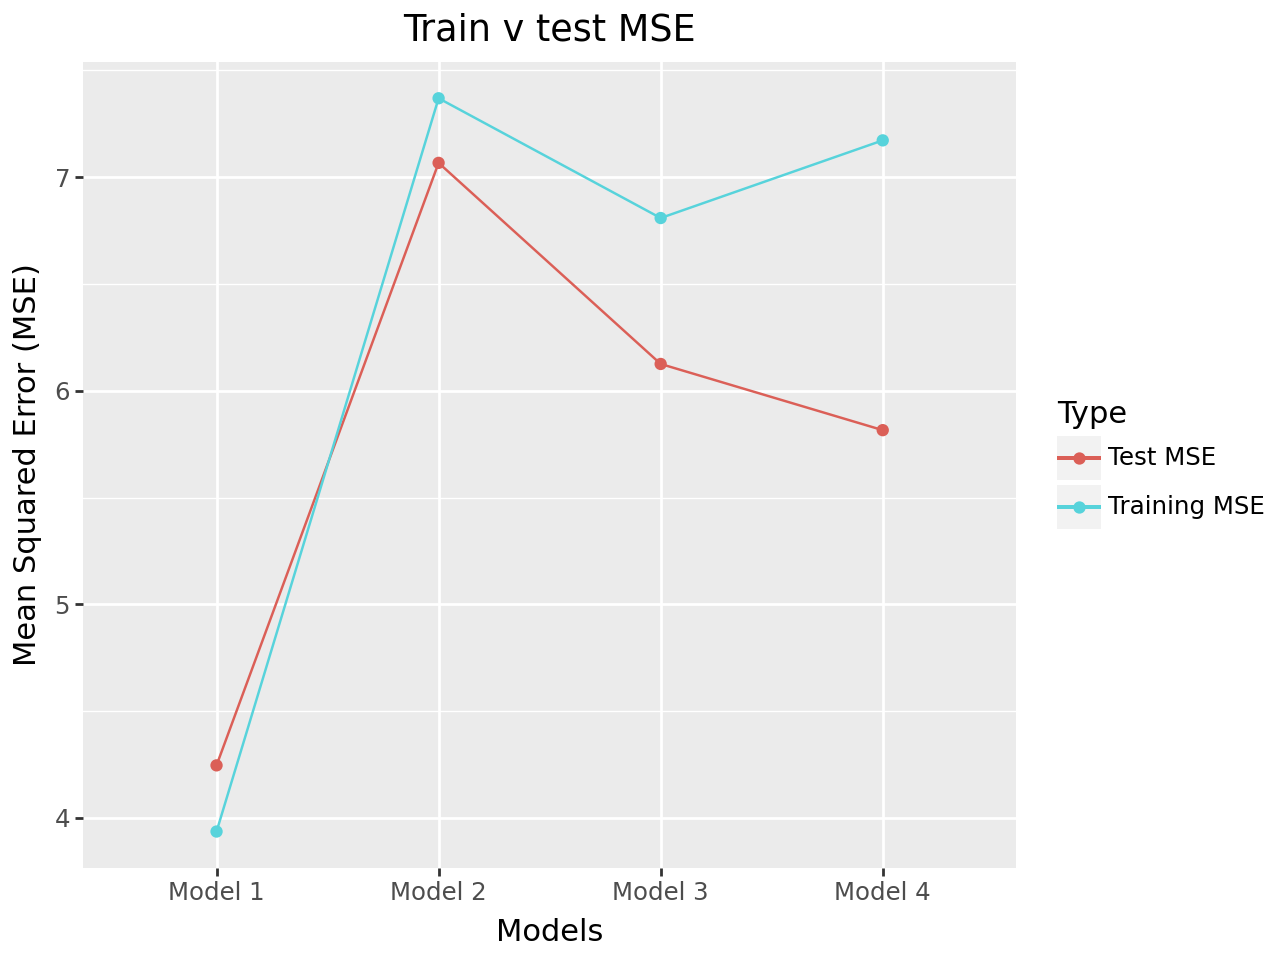

In [18]:
mse_train = [mse_train1, mse_train2, mse_train3, mse_train4]
mse_test = [mse_test1, mse_test2, mse_test3, mse_test4]

data = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'] * 2,
    'MSE': mse_train + mse_test,
    'Type': ['Training MSE'] * 4 + ['Test MSE'] * 4
})

(ggplot(data, aes(x='Model', y='MSE', color='Type', group='Type'))
 + geom_line()
 + geom_point() 
 + labs(
    title='Train v test MSE',
    x='Models',
    y='Mean Squared Error (MSE)'))

Based on the plot and MSE alone, I would likely choose model 4, because of it's strong test MSE. Intuitively, this makes sense becasuse it contains the dummy variable sex, unlike the other models. I would not choose Model 1, even though it has the lowest test and training MSE, for 2 reasons. The first is because it has a low R^2, and likely underfits the data with only 1 variable. The second reason is because it has a greater test MSE than Training, unlike the other models. 
 